# 10. Bayesian Statistics (Advanced)

This notebook provides a brief introduction to Bayesian statistics, a different paradigm of statistical inference from the frequentist approach we've mostly seen so far. Bayesian inference is about updating our beliefs in the light of new evidence.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')

## 10.1 Bayesian vs. Frequentist Inference

- **Frequentist View:** Probability is the long-run frequency of an event. Parameters (like a population mean `μ`) are fixed, unknown constants. We use data to create confidence intervals or p-values to make statements about these parameters.

- **Bayesian View:** Probability is a 'degree of belief' about a statement. Parameters are random variables about which we can have a belief, and we use data to *update* that belief. The result of a Bayesian analysis is a **posterior distribution** that represents our updated belief.

## 10.2 The Core Concepts (Bayes' Theorem)

The foundation of Bayesian statistics is Bayes' Theorem:
$$ P(\theta | D) = \frac{P(D | \theta) \times P(\theta)}{P(D)} $$    
Where:
- **P(θ|D) - Posterior:** Our updated belief about the parameter `θ` after seeing the data `D`.
- **P(D|θ) - Likelihood:** The probability of observing the data `D` given a particular value of the parameter `θ`.
- **P(θ) - Prior:** Our initial belief about the parameter `θ` *before* seeing any data.
- **P(D) - Evidence:** The marginal probability of the data. It acts as a normalization constant.

In simpler terms: **Posterior ∝ Likelihood × Prior**

## 10.3 A Simple Bayesian Update Example

**Problem:** We want to estimate the fairness of a coin (the probability of heads, `θ`).

1.  **Prior:** We have no idea if the coin is fair. We can assume any value of `θ` from 0 to 1 is equally likely. This is a **uniform distribution**.
2.  **Data (Likelihood):** We flip the coin 10 times and get 7 heads (H) and 3 tails (T).
3.  **Posterior:** We update our prior belief with the data.

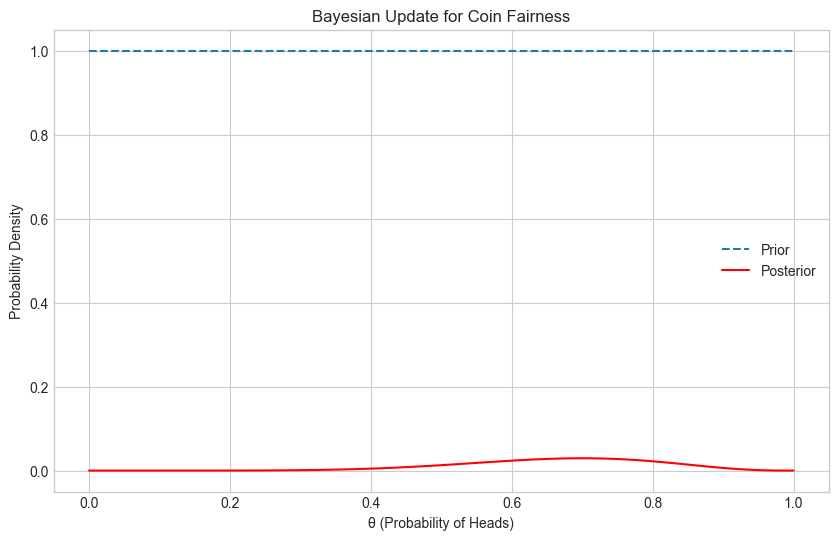

Our initial belief (prior) was flat, but after observing 7 heads in 10 flips, our belief has shifted. The most likely value for θ (the peak of the posterior) is now around 0.7.


In [4]:
# 1. Define the parameter space (possible values for θ)
theta_values = np.linspace(0, 1, 101)

# 2. Define our prior belief (uniform distribution)
prior = stats.uniform.pdf(theta_values)

# 3. Define the likelihood (Binomial distribution)
n_trials = 10
n_heads = 7
likelihood = stats.binom.pmf(k=n_heads, n=n_trials, p=theta_values)

# 4. Calculate the posterior (unnormalized)
posterior_unnormalized = likelihood * prior

# 5. Normalize the posterior so it sums to 1
posterior = posterior_unnormalized / np.sum(posterior_unnormalized)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior, label='Prior', linestyle='--')
plt.plot(theta_values, posterior, label='Posterior', color='red')
plt.title('Bayesian Update for Coin Fairness')
plt.xlabel('θ (Probability of Heads)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print("Our initial belief (prior) was flat, but after observing 7 heads in 10 flips, our belief has shifted. The most likely value for θ (the peak of the posterior) is now around 0.7.")

## 10.4 Markov Chain Monte Carlo (MCMC)

In our simple example, we could easily calculate the posterior. For more complex models, this is often mathematically intractable. **MCMC** methods are a class of algorithms for **sampling from a probability distribution**.

Instead of trying to calculate the posterior distribution directly, MCMC algorithms (like Metropolis-Hastings or Gibbs sampling) draw thousands of samples from it. The resulting set of samples can then be used to approximate the posterior distribution.

**Libraries like `PyMC` and `Stan` are dedicated to performing MCMC for Bayesian modeling.**

## 10.5 Bayesian Regression

A Bayesian approach can also be applied to regression. Instead of finding a single best-fit line (i.e., single values for the intercept and slope), Bayesian regression produces a **posterior distribution for each of the model's parameters**.

**Advantages:**
- **Quantifies Uncertainty:** It gives you a full distribution of credible values for your parameters, not just a point estimate and a confidence interval.
- **Incorporates Prior Knowledge:** You can formally include prior beliefs about the parameters in your model.
- **Flexibility:** It's well-suited for complex hierarchical or mixed-effects models.